# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# # show figures in the notebook
%matplotlib inline 


sc.settings.set_figure_params(dpi=200) # save umaps as non-vectorial hi-res images
# plt.rcParams['figure.figsize']=(10,10) # make figures square if not using the setting bellow
sc.set_figure_params(frameon=False)



In [3]:
import sys
sys.path.append('/data/angela/src/scVI_TSP/')
sys.path.append('/data/angela/sapiens/tabula-sapiens/')
# from utils.annotations_utils import *
from utils.colorDict import *
from utils.general_utils import *
from utils.plotting_utils import *

# Load the color dictionaries

In [4]:
import matplotlib.pyplot as plt

# create a color dictionary for tissues
def tissue_colors():
    
    tissue_color_dict = {'Bladder': '#e7969c',
             'Blood': '#d6616b',
             'Bone_Marrow': '#cedb9c',
             'Eye': '#c7ea46',#"#00ff7f",
             'Ear': '#194E7D', # '#e7e694',
             'Fat': '#ECC98C', 
             'Heart': '#ff0800',
             'Kidney': '#7b4173',
             'Large_Intestine': '#31a354',
             'Liver': '#000080',
             'Lung': '#3182bd',
             'Lymph_Node': '#8c6d31',
             'Mammary':'#ce6dbd',
             'Muscle': '#e7ba52',
             'Ovary':'#e2e752',
             'Pancreas': '#fd8d3c',
             'Prostate':'#637939',#'#a55194',#
             'Salivary_Gland':'#622a0f',
             'Skin': '#de9ed6', 
             'Small_Intestine': '#6baed6',
             'Spleen': '#393b79',
             'Stomach': '#FFE200', # '#4b46cf'
             'Testis': '#626175',
             'Thymus': '#9c9ede',
             'Tongue':'#b5cf6b',
             'Trachea': '#969696',
             'Uterus':'#c64b8c',#'#ff0090',
             'Vasculature': '#843c39'}
    
    return tissue_color_dict




# create a color dictionary for donors
def donor_colors():
    donors = ['TSP1','TSP2','TSP3','TSP4','TSP5','TSP6','TSP7','TSP8','TSP9','TSP10','TSP11','TSP12','TSP13','TSP14','TSP15','TSP17','TSP19','TSP20','TSP21','TSP25','TSP26','TSP27','TSP28','TSP30']

    import matplotlib.colors as pltcolors
    
    cmap = plt.cm.get_cmap("YlGnBu")
        
    donor_color_dict = {}
    j=1/len(donors)
    for d in donors:
        donor_color_dict[d] = pltcolors.to_hex(cmap(j))
        j+=1/len(donors)
        
    return donor_color_dict


# create a color dictionary for compartments
def compartment_colors():
    
    compartments = ['Endothelium', 'Epithelium', 'Immune', 'Stroma', "Germline",'Neural']
    
    import matplotlib.colors as pltcolors
    
    cmap = plt.cm.get_cmap("YlOrRd")
        
    compartment_color_dict = {}
    j=1/len(compartments)
    for c in compartments:
        compartment_color_dict[c] = pltcolors.to_hex(cmap(j))
        j+=1/len(compartments)
        
    return compartment_color_dict


# create a color dictionary for methods
def method_colors():
    methods = ['10X','smartseq2']
    
    import matplotlib.colors as pltcolors
    
    method_color_dict = {}
    method_color_dict['10X'] = '#90ee90'
    method_color_dict['smartseq2'] = '#006400'
    
    return method_color_dict

# create a color dictionary for assay
def assay_colors():
    assays = ['10X_3Prime_v3.1','10X_5Prime_v2','smartseq2']
    
    import matplotlib.colors as pltcolors
    
    assay_color_dict = {}
    assay_color_dict['10X_3Prime_v3.1'] = '#90ee90' #green
    assay_color_dict['10X_5Prime_v2'] = '#429642'
    assay_color_dict['smartseq2'] = '#006400'
    
    return assay_color_dict

# create a color dictionary for sex
def sex_colors():
    sexes = ['male','female','undisclosed']
    
    import matplotlib.colors as pltcolors
    
    sex_color_dict = {}
    sex_color_dict['female'] = '#f4cae4'
    sex_color_dict['male'] = '#cbd5e8'
#     sex_color_dict['undisclosed'] = '#e6f5c9'
    
    return sex_color_dict

# create a color dictionary for age
def age_colors():
    
    ages = [22.0,26.0,33.0,36.0, 37.0, 38.0,
            40.0,42.0,45.0, 46.0, 55.0, 56.0, 57.0, 59.0,
            60.0, 61.0, 67.0, 69.0, 74.0]

    
    import matplotlib.colors as pltcolors
            
    age_color_dict = {}
    for a in ages:
        if a<40:
            age_color_dict[a] = '#47C16EFF'
            
        elif a<60:
            age_color_dict[a] = "#FDE725FF"
        else:
            age_color_dict[a] = "#400554FF"
            
    return age_color_dict

# visualize the color dictionaries
def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    by_hsv = [(v, k) for k, v in colors.items()]
    
    if sort_colors is True:
        by_hsv = sorted(by_hsv)
    names = [name for hsv, name in by_hsv]

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        swatch_end_x = cell_width * col + swatch_width
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y, swatch_start_x, swatch_end_x,
                  color=colors[name], linewidth=18)

    return fig

In [5]:
donors_color_dict = donor_colors()
tissues_color_dict = tissue_colors()
methods_color_dict = method_colors()
compartments_color_dict = compartment_colors()
sex_color_dict = sex_colors()
age_color_dict = age_colors()

/tmp/ipykernel_23959/2921190753.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("YlGnBu")
/tmp/ipykernel_23959/2921190753.py:64: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("YlOrRd")


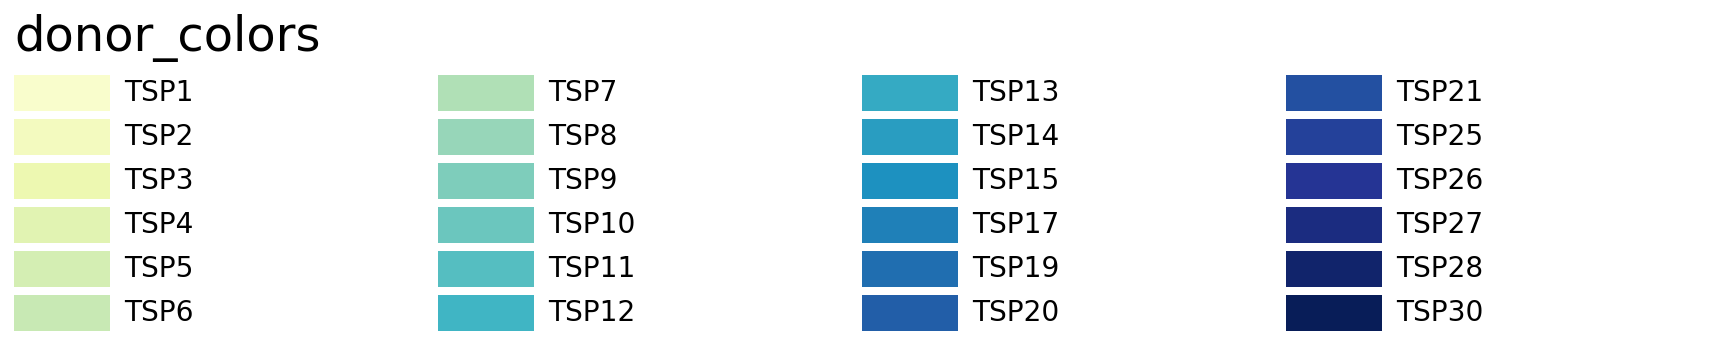

In [6]:
# display(donors_color_dict)
plot_colortable(donors_color_dict,'donor_colors',sort_colors=False)
plt.savefig("./donor_color_dict.pdf")

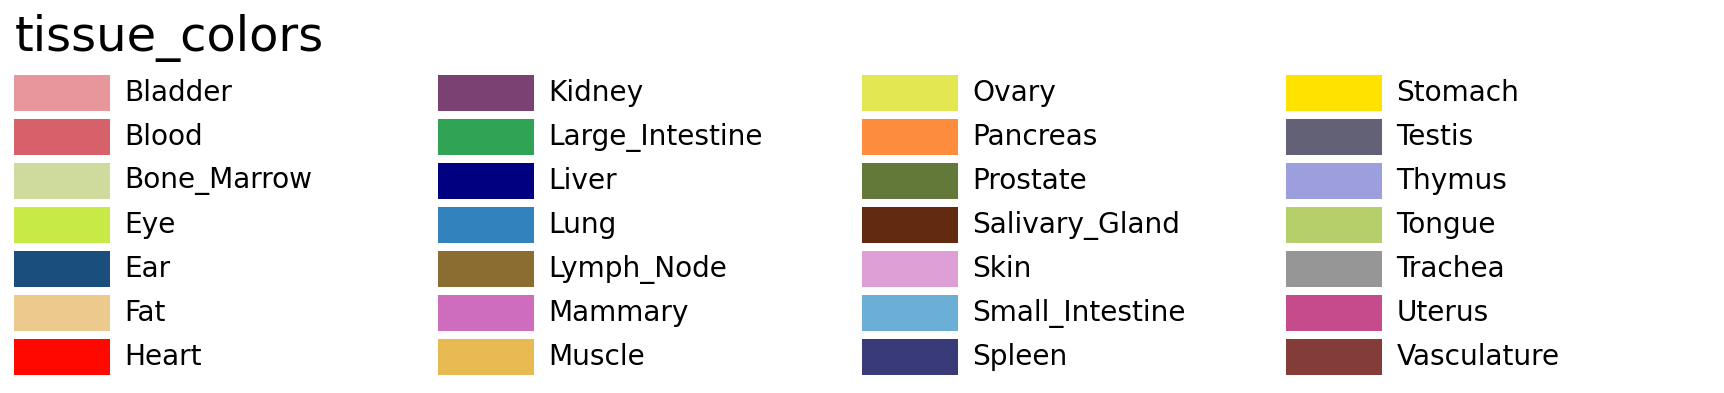

In [7]:
# display(tissues_color_dict)
plot_colortable(tissues_color_dict,'tissue_colors',sort_colors=False)
plt.savefig("./tissue_color_dict.pdf")

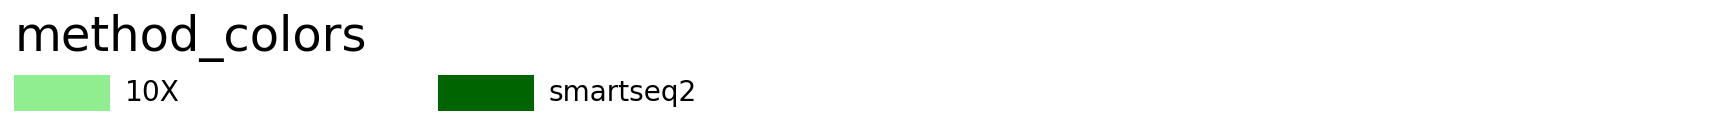

In [8]:
# display(methods_color_dict)
plot_colortable(methods_color_dict,'method_colors',sort_colors=False)
plt.savefig("./method_color_dict.pdf")

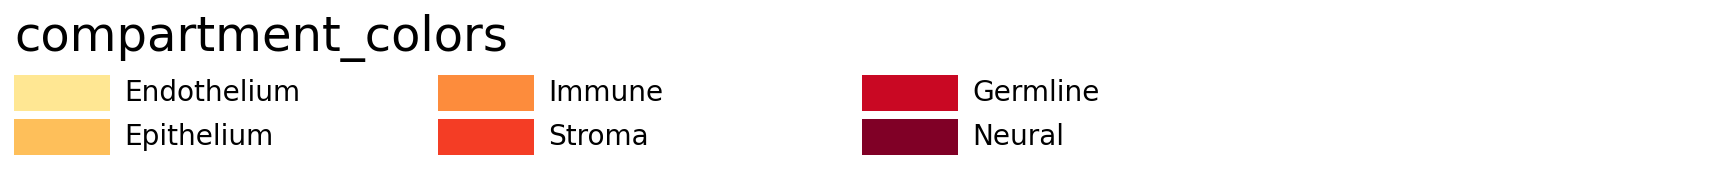

In [9]:
# display(compartments_color_dict)
plot_colortable(compartments_color_dict,'compartment_colors',sort_colors=False)
plt.savefig("./compartment_color_dict.pdf")

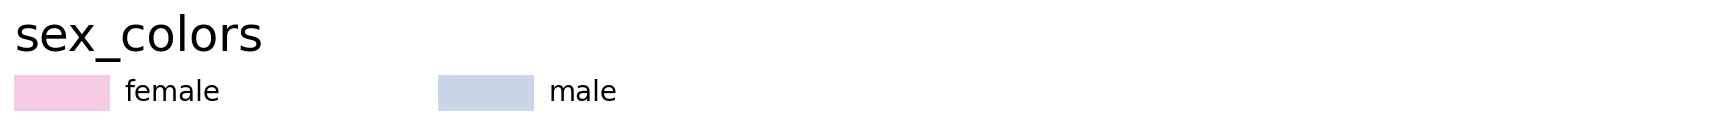

In [10]:
# display(sex_color_dict)
plot_colortable(sex_color_dict,'sex_colors',sort_colors=False)
plt.savefig("./sex_color_dict.pdf")

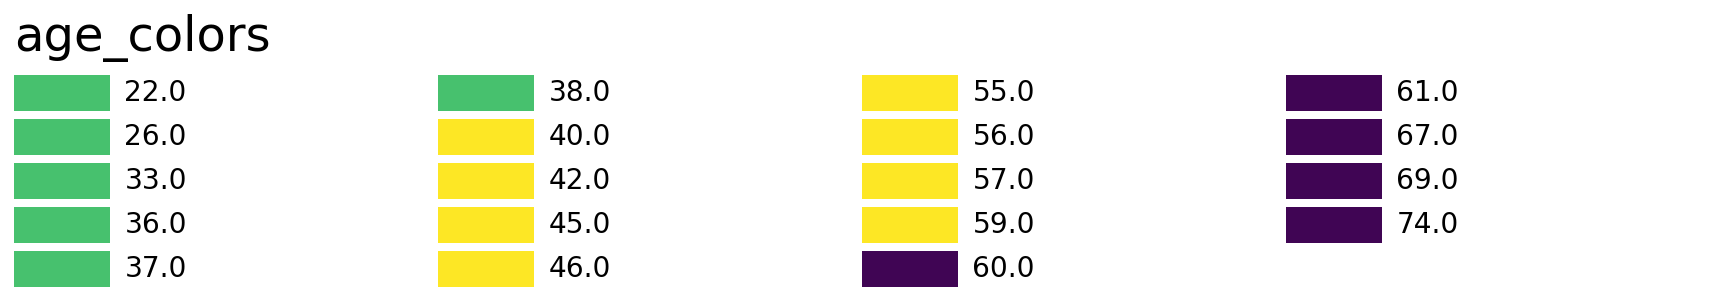

In [11]:
plot_colortable(age_color_dict,'age_colors',sort_colors=False)
plt.savefig("./age_color_dict.pdf")

# Load the data

In [12]:
adata = sc.read_h5ad(
    "/data/angela/hpc/projects/tabula_sapiens/singlecell_transcriptomics/TSP1_30_Paper2_Version2d_Oct2024/full_object/TSP1_30_min200_2500_decontx_scvi_donorassay_version2d_20241126.h5ad"
)
adata

AnnData object with n_obs × n_vars = 1136218 × 61806
    obs: 'donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate', 'library_plate', 'notes', 'cdna_well', 'old_index', 'assay', 'sample_id', 'replicate', '10X_run', '10X_barcode', 'ambient_removal', 'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay', 'cell_ontology_class', 'cell_ontology_id', 'compartment', 'broad_cell_class', 'free_annotation', 'manually_annotated', 'published_2022', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc', 'pct_counts_ercc', '_scvi_batch', '_scvi_labels', 'scvi_leiden_donorassay_full', 'age', 'sex', 'ethnicity', 'sample_number'
    var: 'ensembl_id', 'gene_symbol', 'genome', 'mt', 'ercc', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: '_scvi_manager_uuid', '_scvi_uuid', '_training_mode', 'age_colors', 'assay_colors', 'compartment_colors', 'donor_colors', 'leiden', 'log1p', 'method_color

In [13]:
adata = remove_cats(adata)
metadata = adata.obs.copy()

# Tabula Sapiens overall summary

In [15]:
metadata["count_index"] = metadata.index.copy()
df = metadata.groupby(["tissue","donor",])["count_index"].count().reset_index()
df["donor_numeric"] = [s.split("TSP")[1] for s in df.donor]
df["donor_numeric"]  = df["donor_numeric"].astype(int)
df = df.sort_values(by=["donor_numeric"])

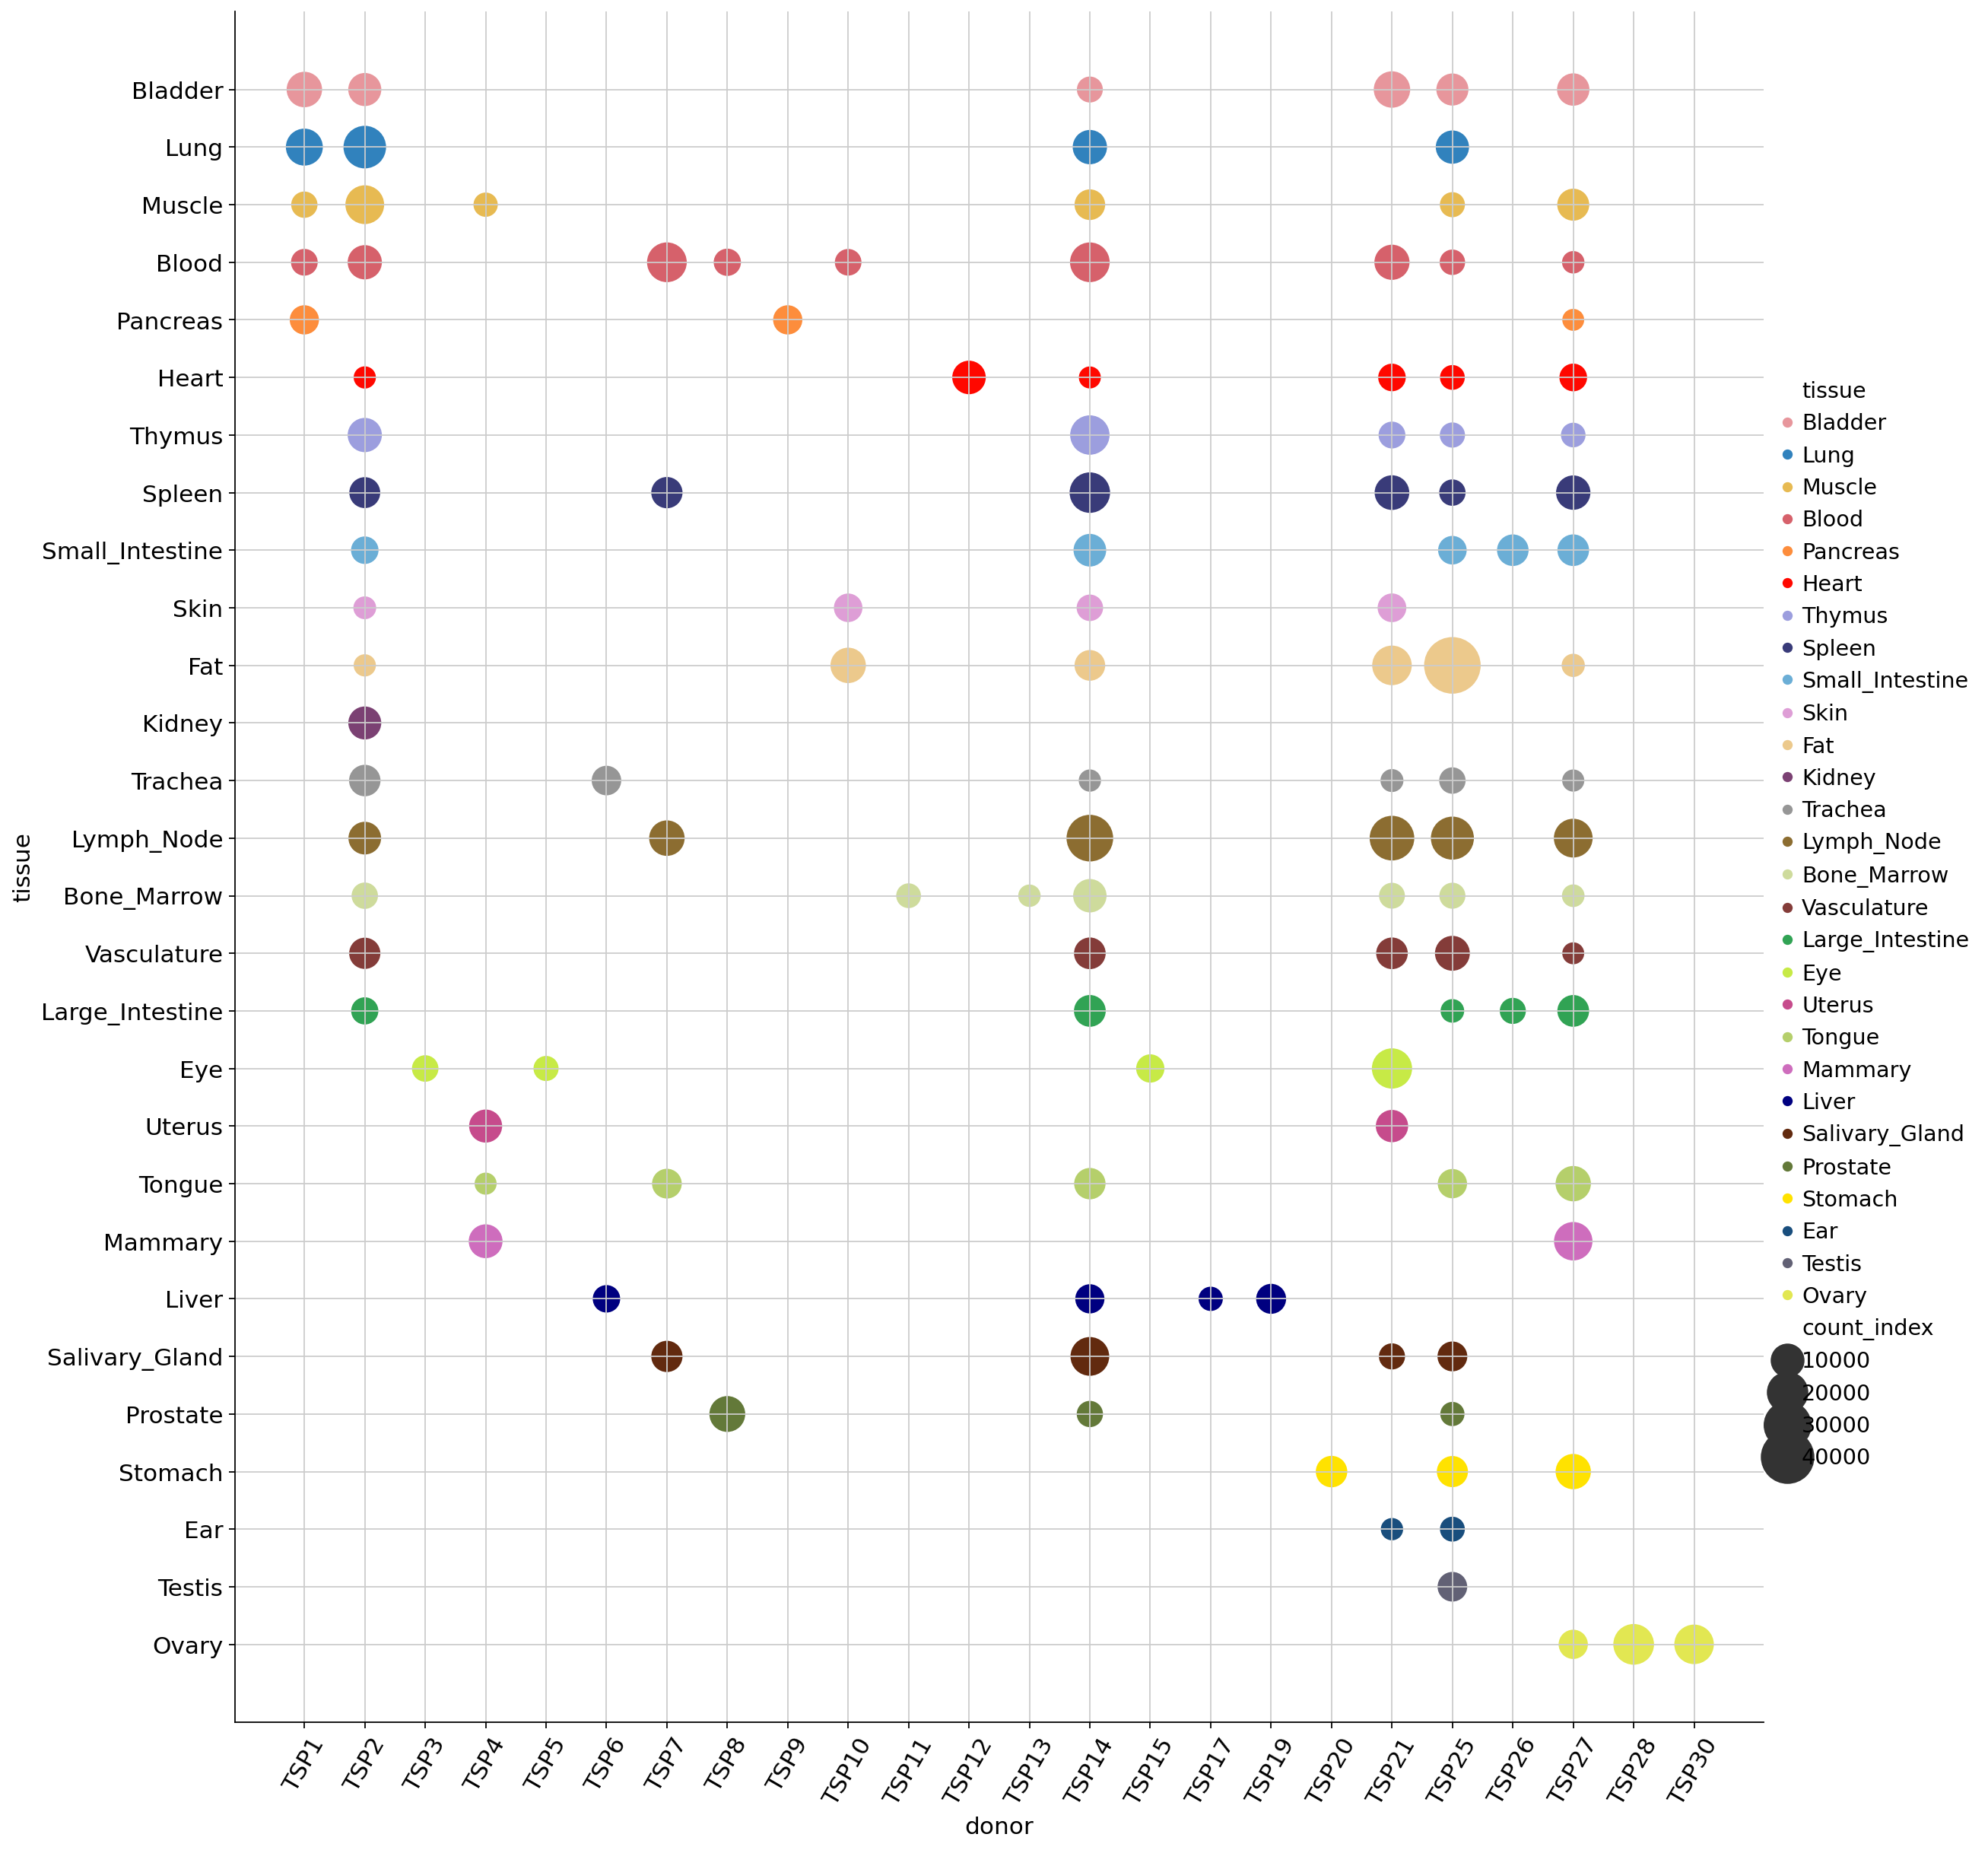

In [16]:
tissue_color_dict = tissue_colors()
ax = sns.relplot(
    data = df, y="tissue", x="donor", size="count_index",
    height=15, 
    hue="tissue",
    palette=tissue_color_dict,
    sizes=(200, 1200),
    row_order = ['TSP1','TSP2','TSP3','TSP4','TSP5',"TSP6","TSP7","TSP8","TSP9","TSP10","TSP11","TSP12","TSP13","TSP14","TSP15","TSP16","TSP17","TSP19","TSP20","TSP21","TSP25","TSP26","TSP27","TSP28","TSP30"]
)
ax.set_xticklabels(rotation=60)

plt.savefig("tsp1_tsp30.pdf")




# UMAP visual inspection

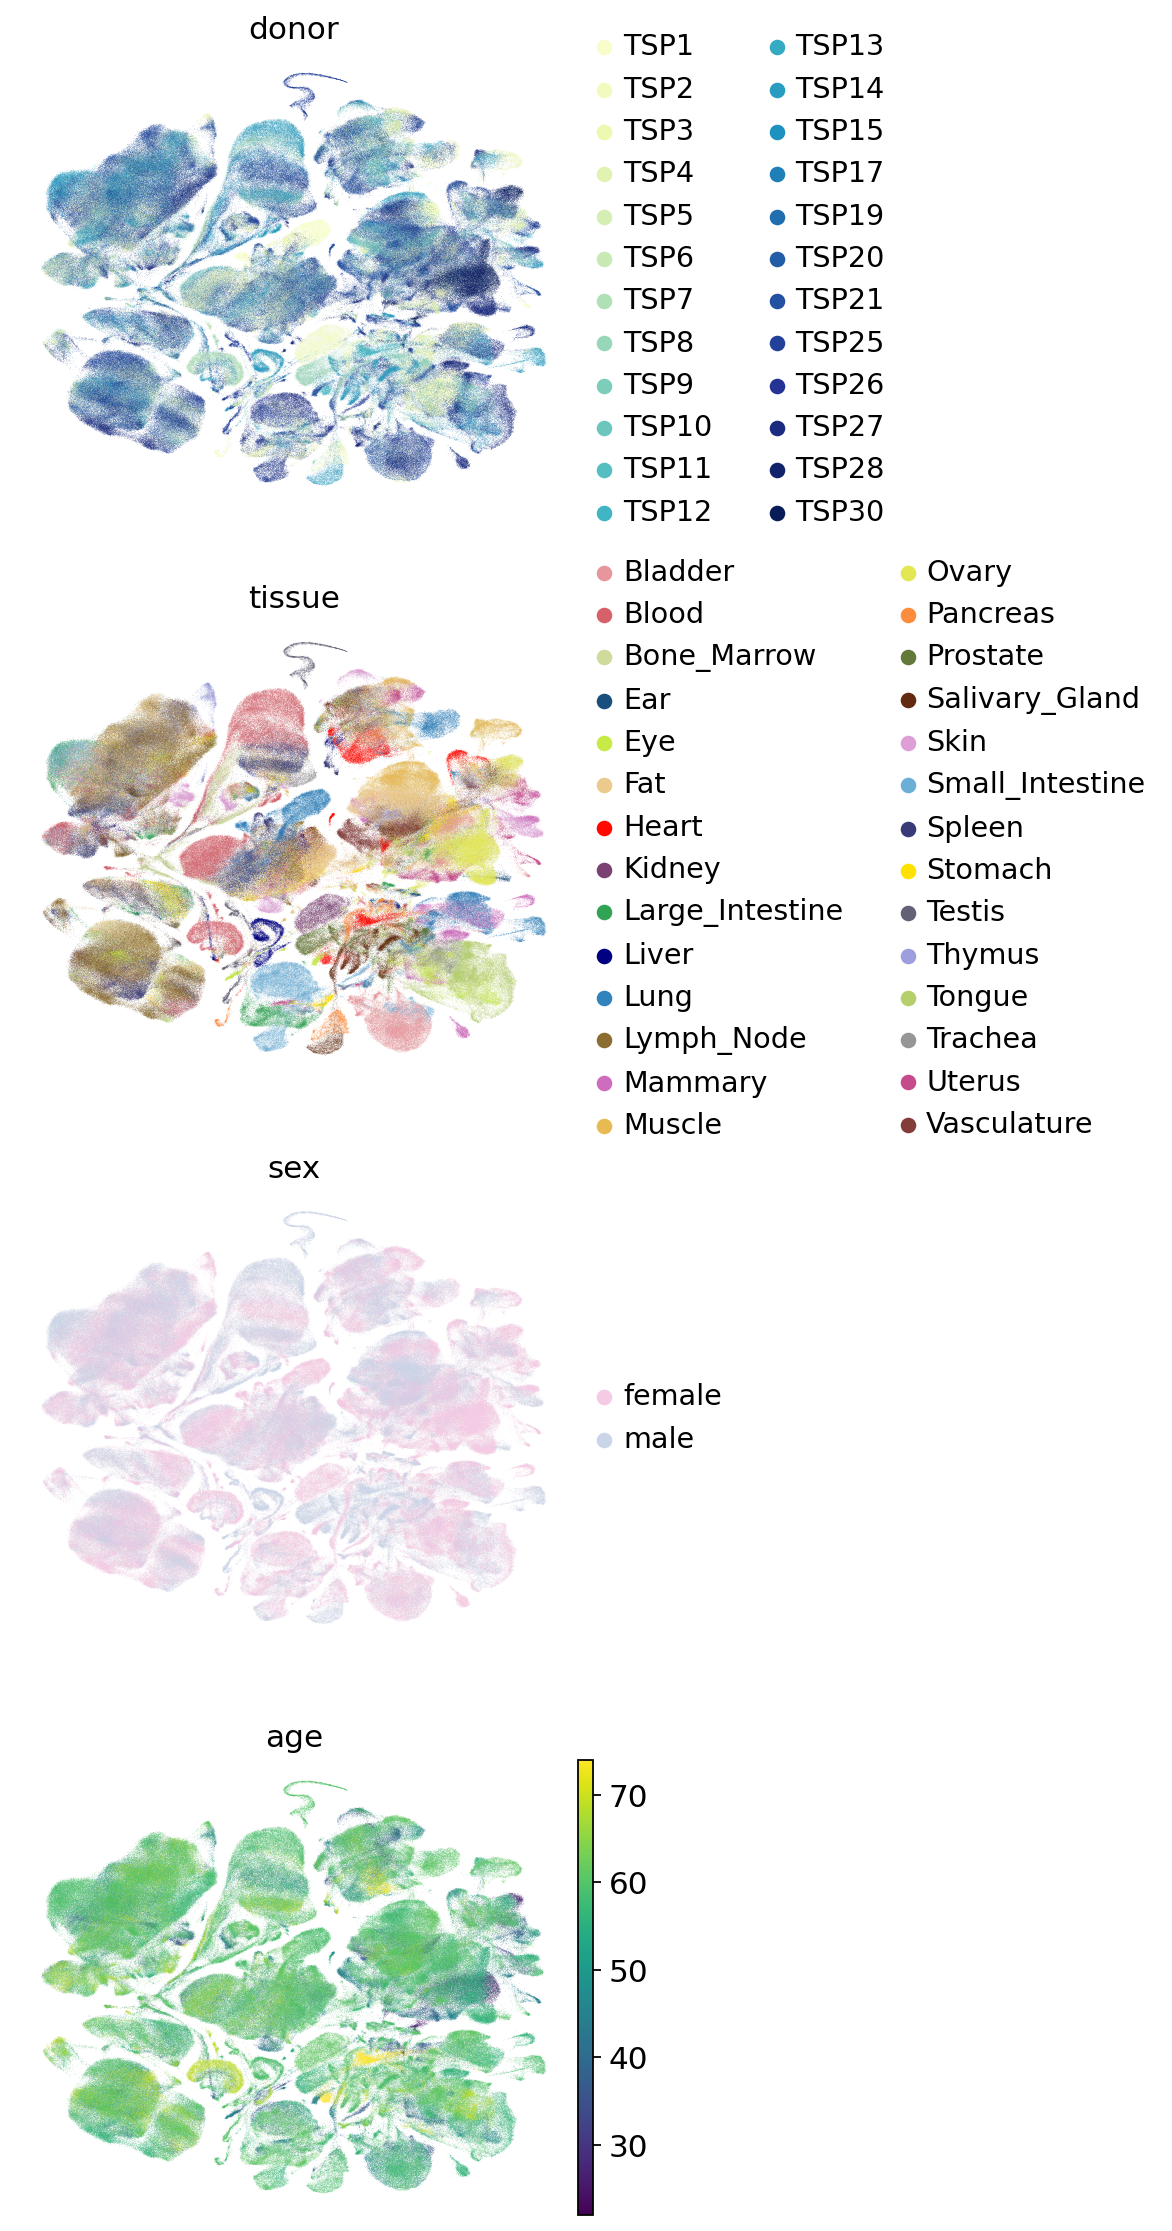

In [18]:
sc.pl.umap(adata,color=["donor","tissue","sex","age"],ncols=1)

# Look at `n_genes`, `n_counts`, `% MT-` across the dataset 

In [19]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

In [20]:
metadata["cellId"] = metadata.index
pd.DataFrame(metadata.groupby(['tissue','donor',])['cellId'].count())

cellId
tissue      donor        
Bladder     TSP1    14498
            TSP14    3686
            TSP2    11486
            TSP21   15760
            TSP25   10300
...                   ...
Vasculature TSP14    9777
            TSP2     9304
            TSP21    9759
            TSP25   13741
            TSP27      69

[123 rows x 1 columns]

In [21]:
donors_v2 = [
    'TSP17',
    'TSP19',
    'TSP20',
    'TSP21',
    'TSP25',
    'TSP26',
    'TSP27',
    'TSP28',
    'TSP30'
]
metadata = metadata[metadata.donor.isin(donors_v2)].copy()

In [22]:
metadata["cellId"] = metadata.index

In [23]:
pd.DataFrame(metadata.groupby(['donor','tissue','method'])['cellId'].count())

cellId
donor tissue      method          
TSP17 Liver       10X         2114
TSP19 Liver       10X         7888
TSP20 Stomach     10X         9201
                  smartseq     374
TSP21 Bladder     10X        15760
...                            ...
TSP27 Vasculature 10X           69
TSP28 Ovary       10X        19551
                  smartseq    2240
TSP30 Ovary       10X        18739
                  smartseq    1327

[63 rows x 1 columns]

In [24]:
metadata.columns

Index(['donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate',
       'library_plate', 'notes', 'cdna_well', 'old_index', 'assay',
       'sample_id', 'replicate', '10X_run', '10X_barcode', 'ambient_removal',
       'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay',
       'cell_ontology_class', 'cell_ontology_id', 'compartment',
       'broad_cell_class', 'free_annotation', 'manually_annotated',
       'published_2022', 'n_genes_by_counts', 'total_counts',
       'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc',
       'pct_counts_ercc', '_scvi_batch', '_scvi_labels',
       'scvi_leiden_donorassay_full', 'age', 'sex', 'ethnicity',
       'sample_number', 'count_index', 'cellId'],
      dtype='object')

In [25]:
donors_color_dict.keys()

dict_keys(['TSP1', 'TSP2', 'TSP3', 'TSP4', 'TSP5', 'TSP6', 'TSP7', 'TSP8', 'TSP9', 'TSP10', 'TSP11', 'TSP12', 'TSP13', 'TSP14', 'TSP15', 'TSP17', 'TSP19', 'TSP20', 'TSP21', 'TSP25', 'TSP26', 'TSP27', 'TSP28', 'TSP30'])

In [26]:
donors_v2

['TSP17',
 'TSP19',
 'TSP20',
 'TSP21',
 'TSP25',
 'TSP26',
 'TSP27',
 'TSP28',
 'TSP30']

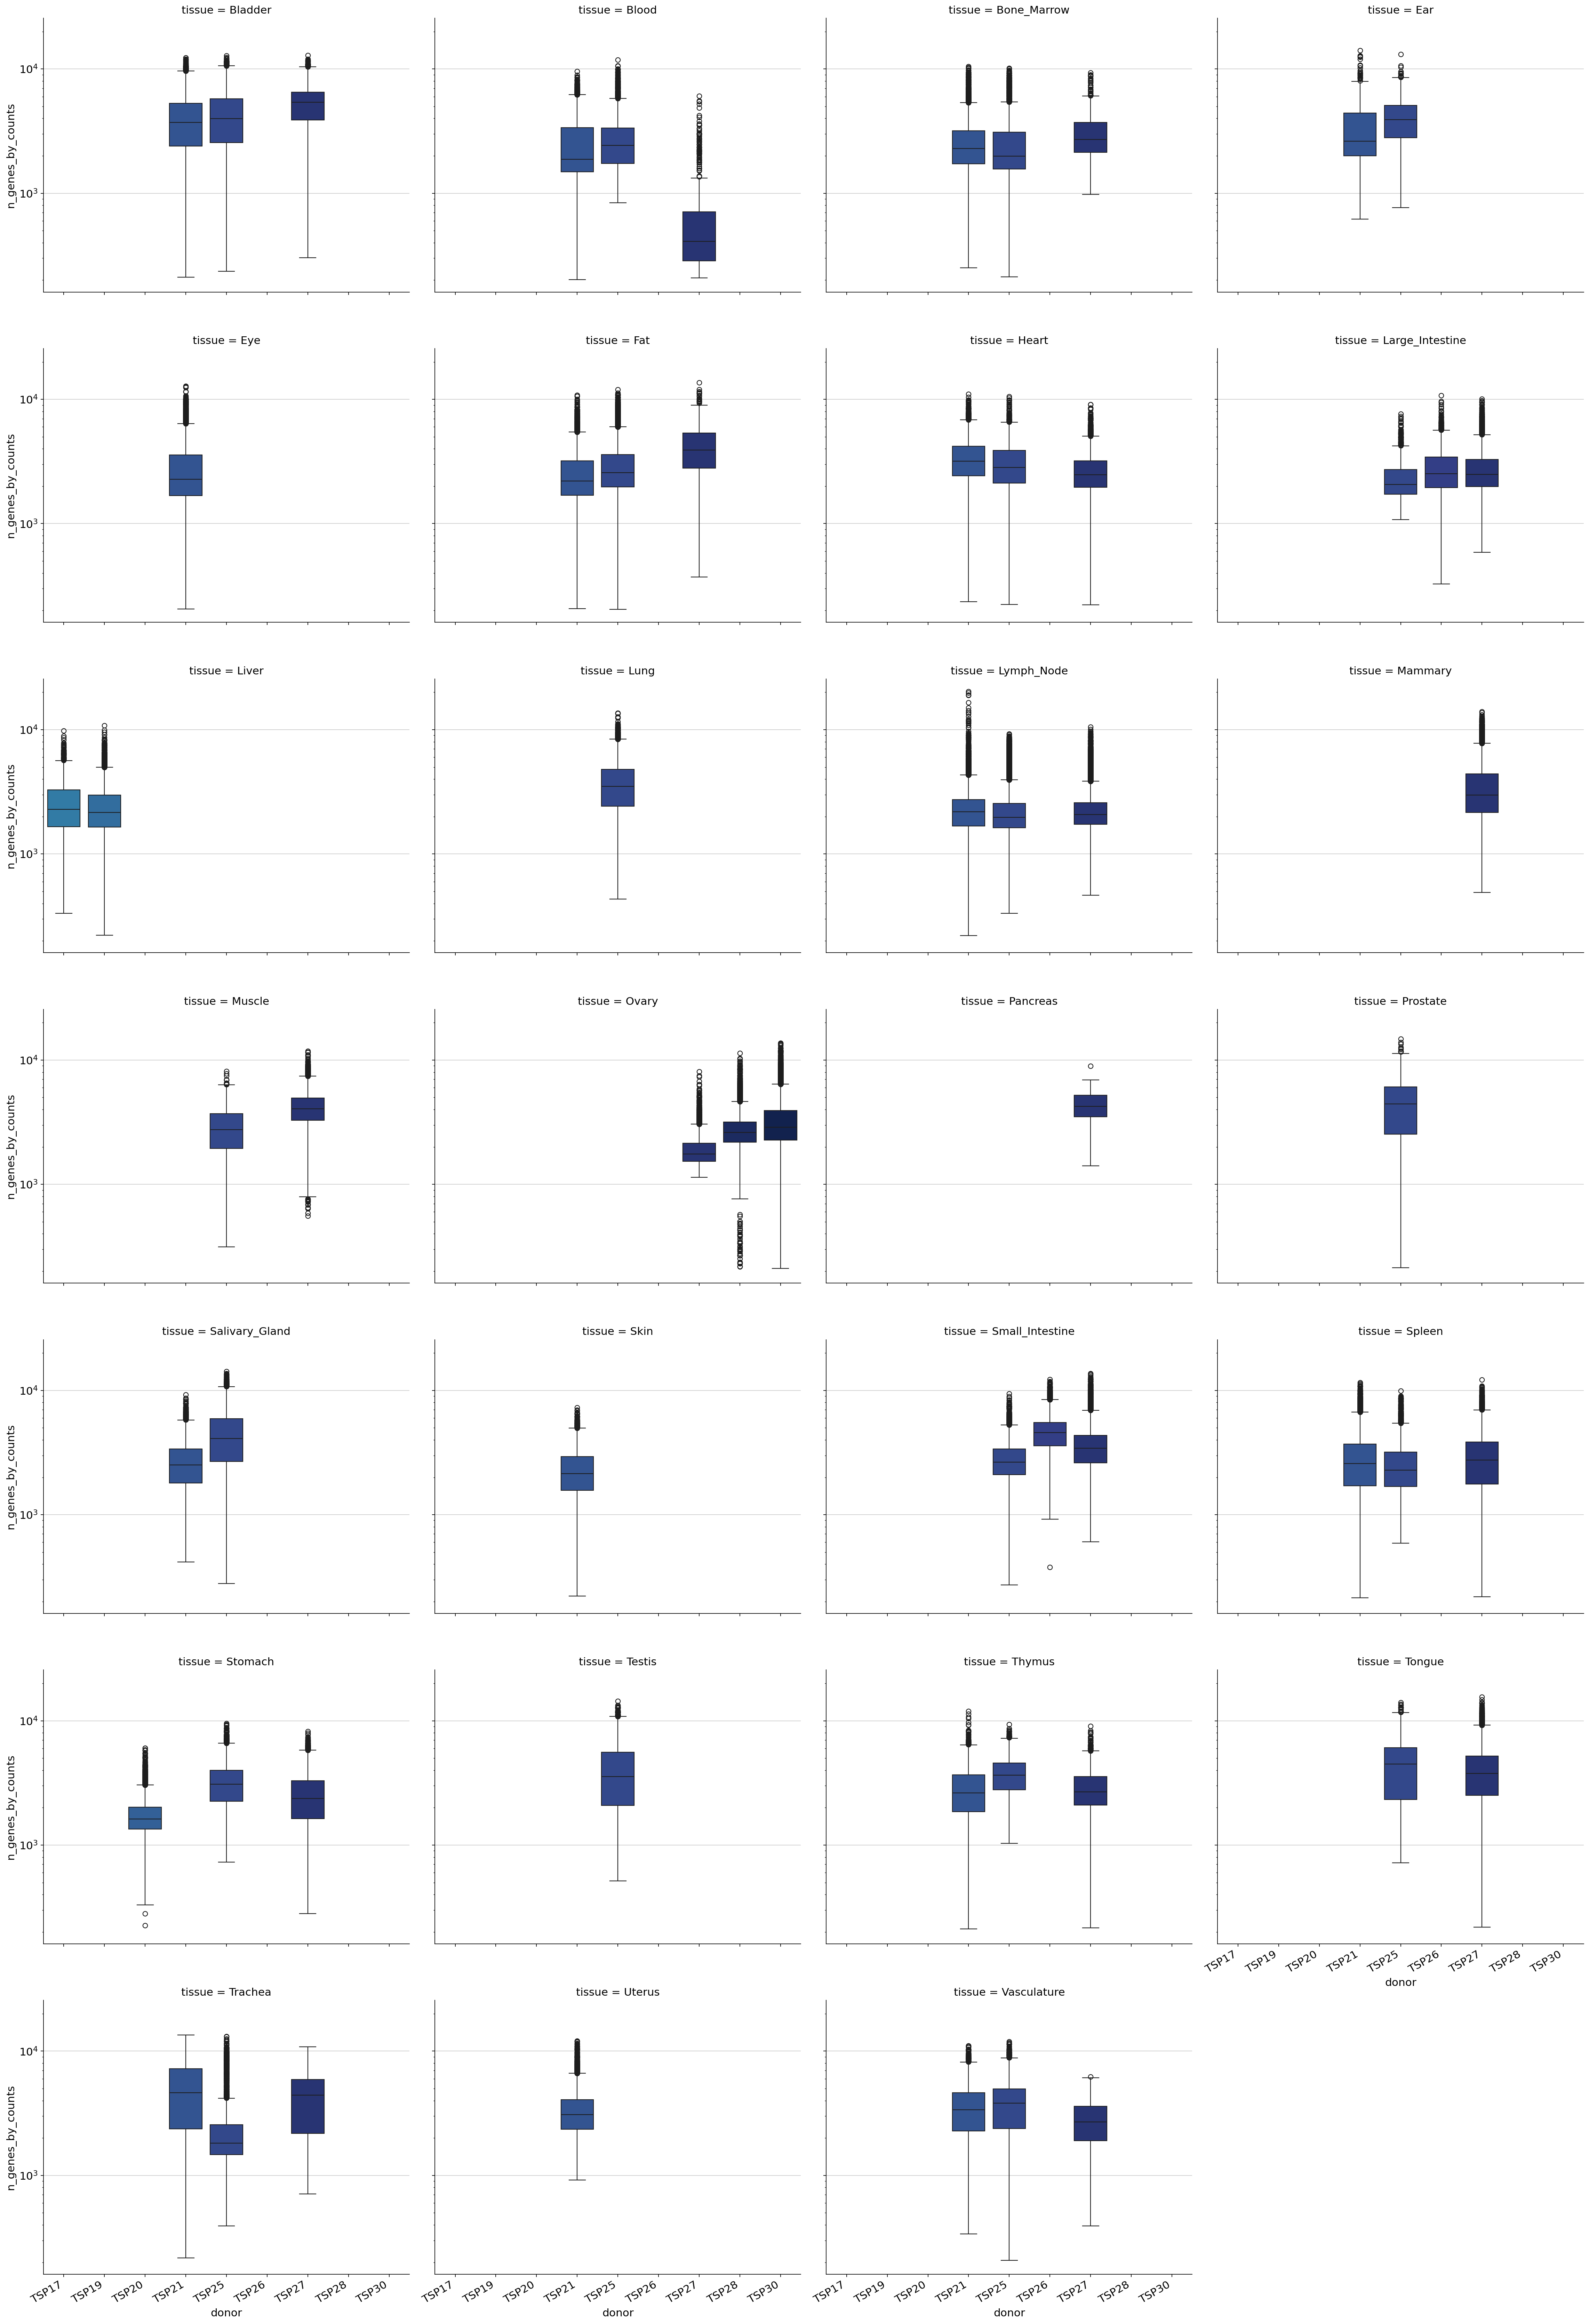

In [27]:
# Run for 10x genes
df = metadata[metadata['method'] == '10X']
tissue_order = list(set(df["tissue"]))
tissue_order.sort()

# Create FacetGrid
g = sns.FacetGrid(
    df, 
    col="tissue", 
    col_wrap=4, 
    height=6, 
    aspect=1.2, 
    col_order=tissue_order
)

# number of genes
def boxplot_with_colors(data, **kwargs):
    sns.boxplot(
        data=data,
        x="donor",
        y="n_genes_by_counts",
        hue="donor",  # Fix the warning
        order=donors_v2,
        palette=donors_color_dict,
        dodge=False,
        legend=False,
        **kwargs
    )

g.map_dataframe(boxplot_with_colors)
g.set(yscale='log')
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')

plt.tight_layout()
plt.savefig("figures/paper2/ts_10X_ngenes.pdf")


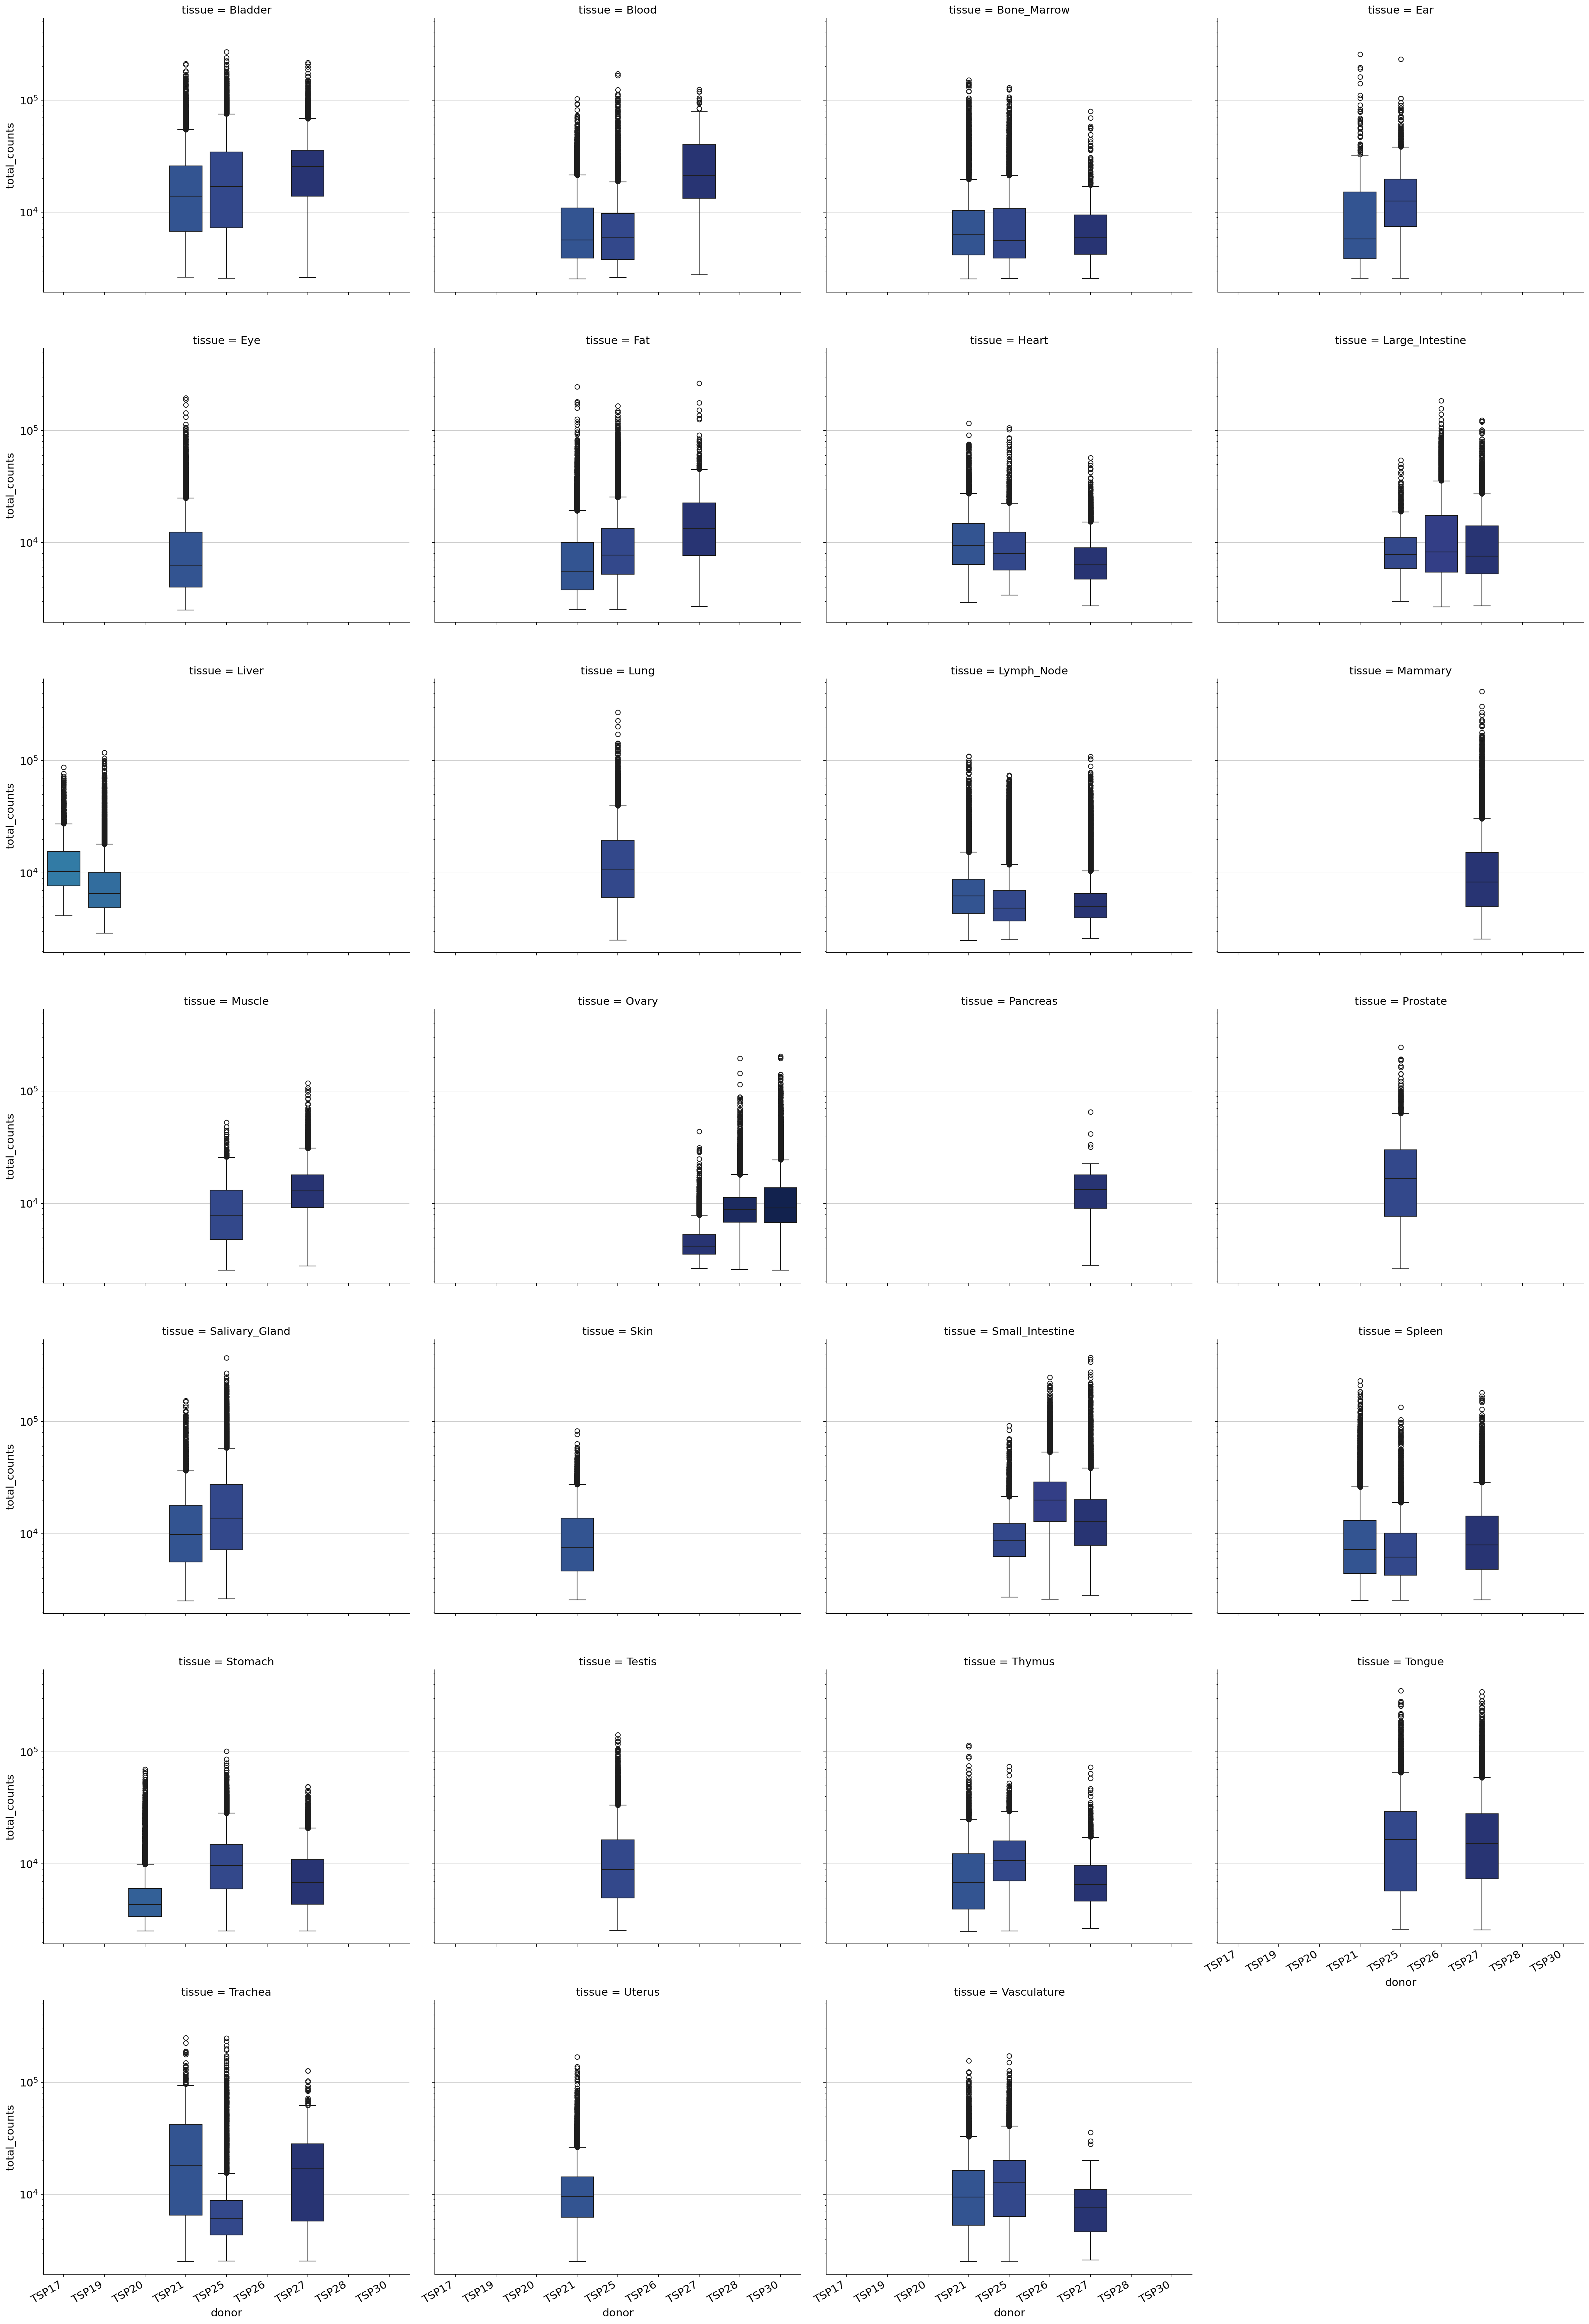

In [28]:
# Run for 10x counts
df = metadata[metadata['method'] == '10X']
tissue_order = list(set(df["tissue"]))
tissue_order.sort()

# Create FacetGrid
g = sns.FacetGrid(
    df, 
    col="tissue", 
    col_wrap=4, 
    height=6, 
    aspect=1.2, 
    col_order=tissue_order
)

# number of counts
def boxplot_with_colors(data, **kwargs):
    sns.boxplot(
        data=data,
        x="donor",
        y="total_counts",
        hue="donor",  # Fix the warning
        order=donors_v2,
        palette=donors_color_dict,
        dodge=False,
        legend=False,
        **kwargs
    )

g.map_dataframe(boxplot_with_colors)
g.set(yscale='log')
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')

plt.tight_layout()
plt.savefig("figures/paper2/ts_10X_ncounts.pdf")


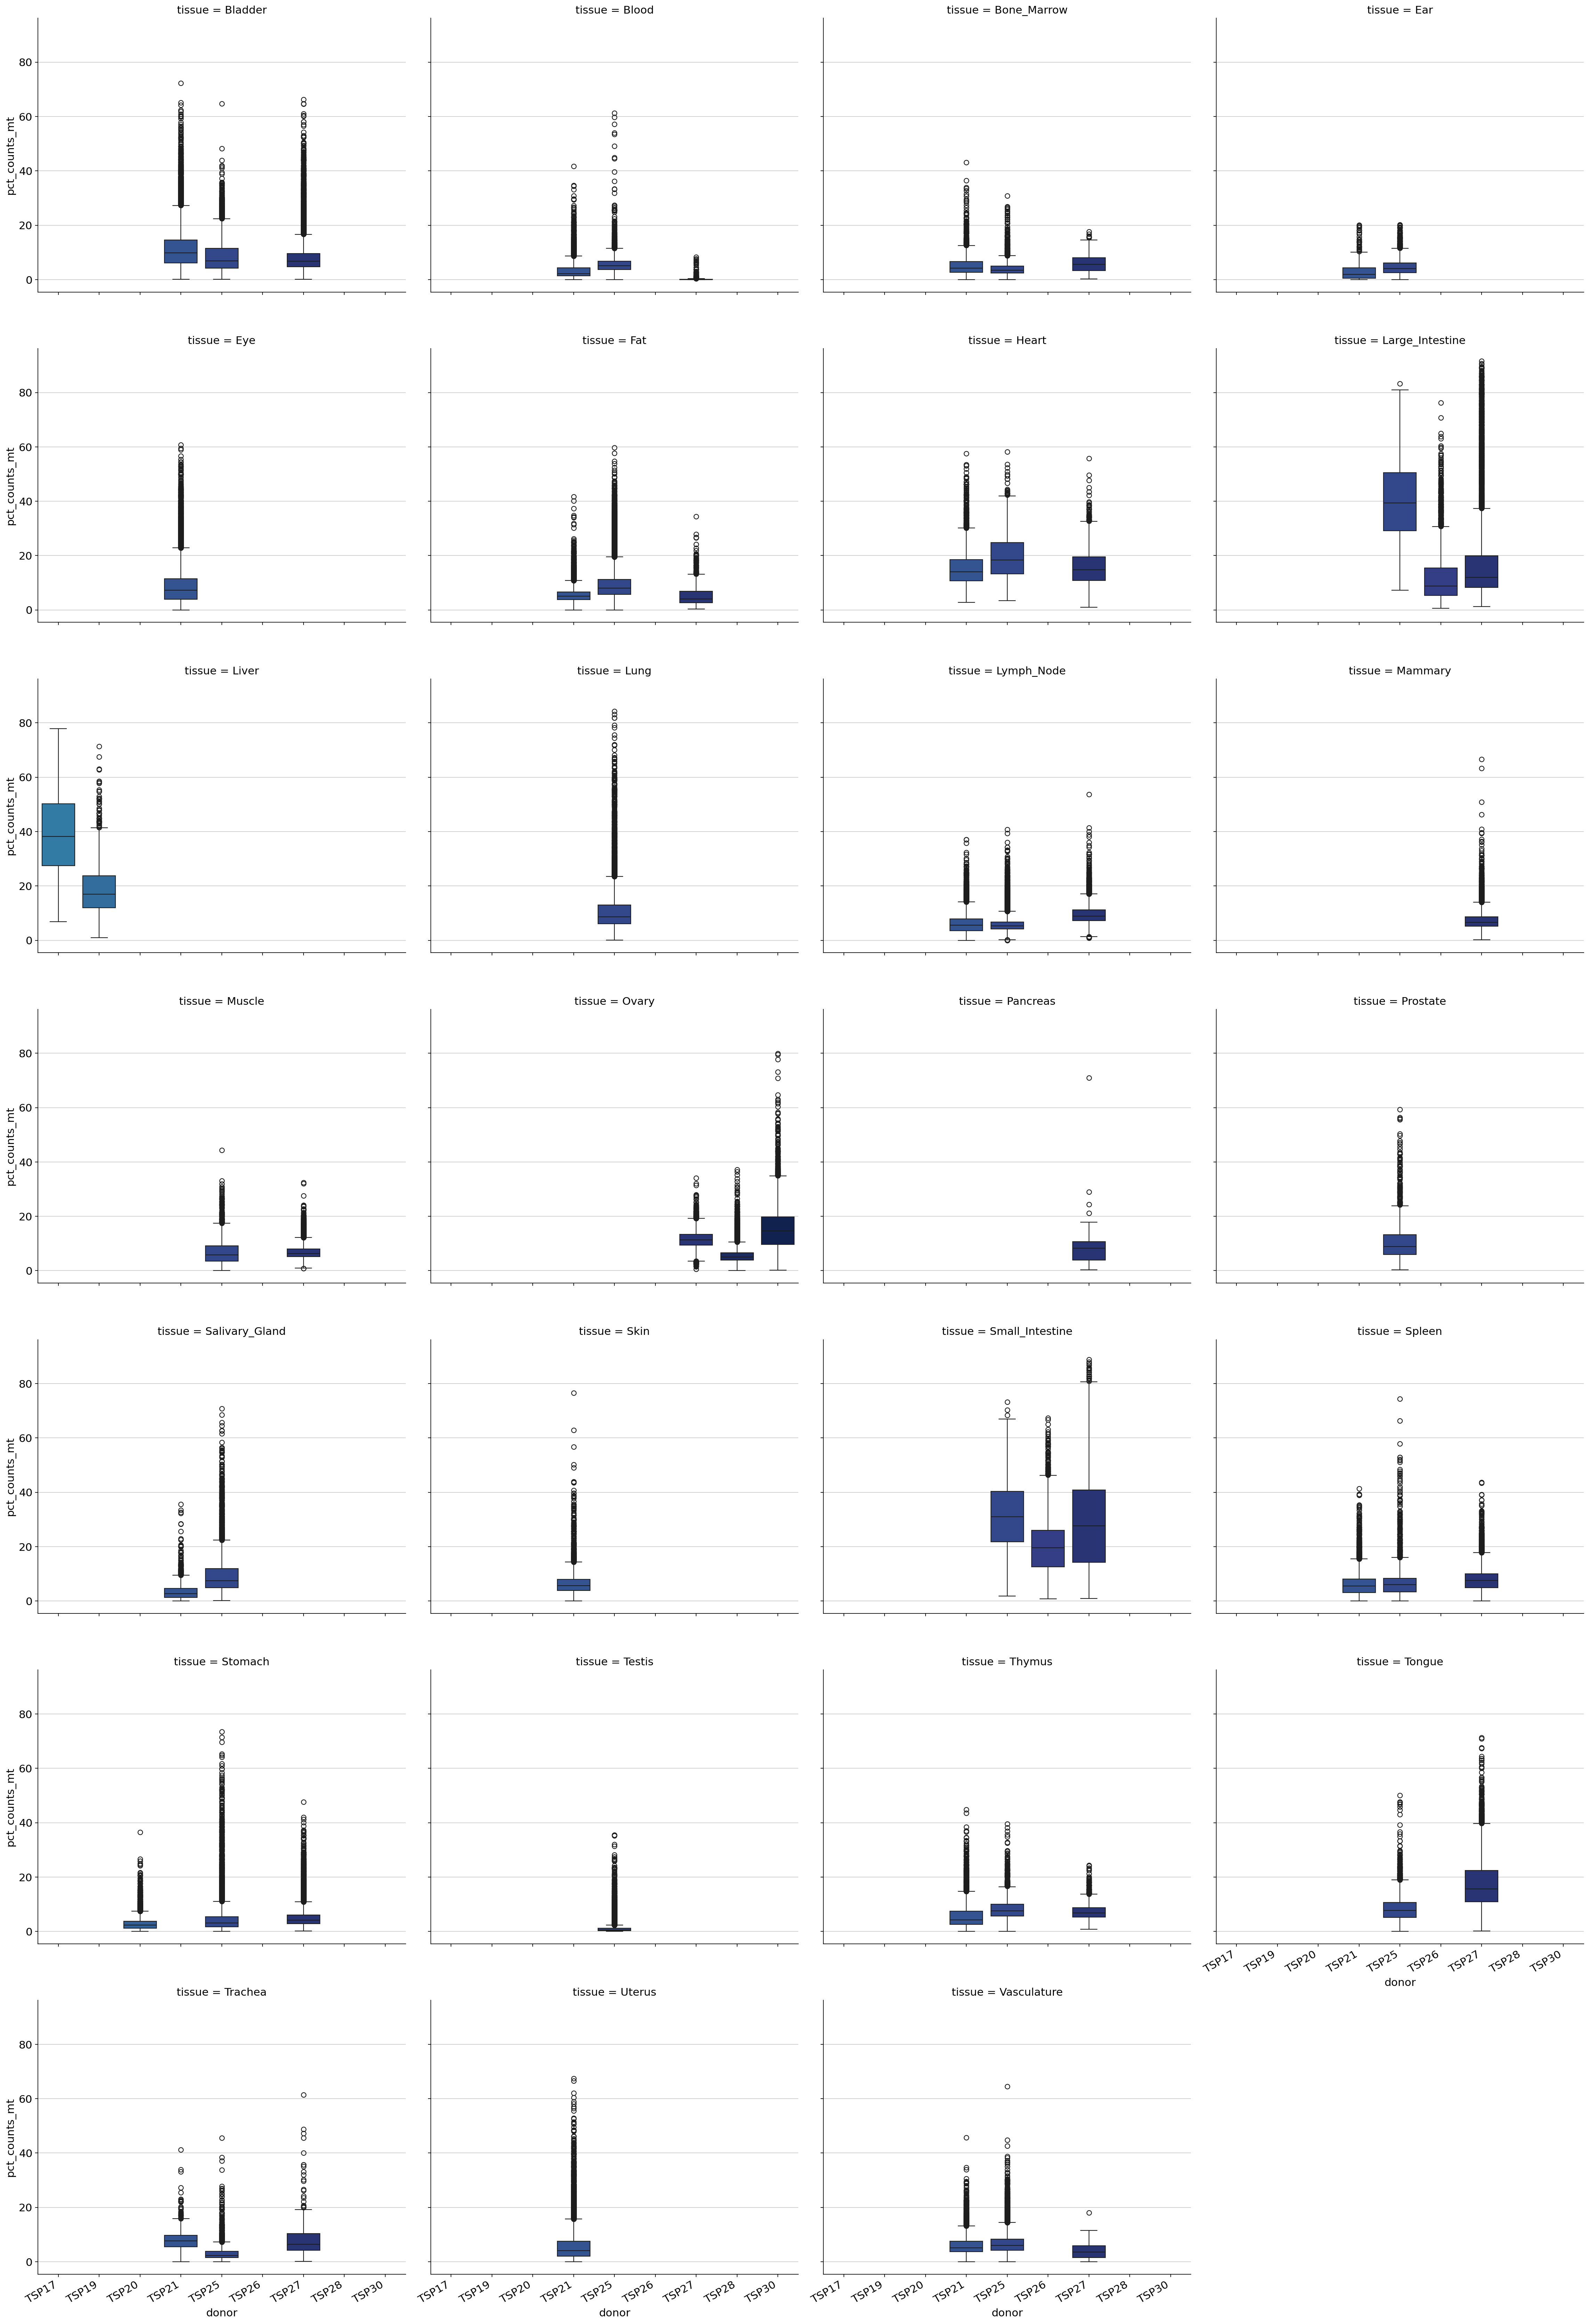

In [29]:
# Run for 10x %mt
df = metadata[metadata['method'] == '10X']
tissue_order = list(set(df["tissue"]))
tissue_order.sort()

# Create FacetGrid
g = sns.FacetGrid(
    df, 
    col="tissue", 
    col_wrap=4, 
    height=6, 
    aspect=1.2, 
    col_order=tissue_order
)

# number of counts
def boxplot_with_colors(data, **kwargs):
    sns.boxplot(
        data=data,
        x="donor",
        y="pct_counts_mt",
        hue="donor",  # Fix the warning
        order=donors_v2,
        palette=donors_color_dict,
        dodge=False,
        legend=False,
        **kwargs
    )

g.map_dataframe(boxplot_with_colors)
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')

plt.tight_layout()
plt.savefig("figures/paper2/ts_10X_pct_counts_mt.pdf")


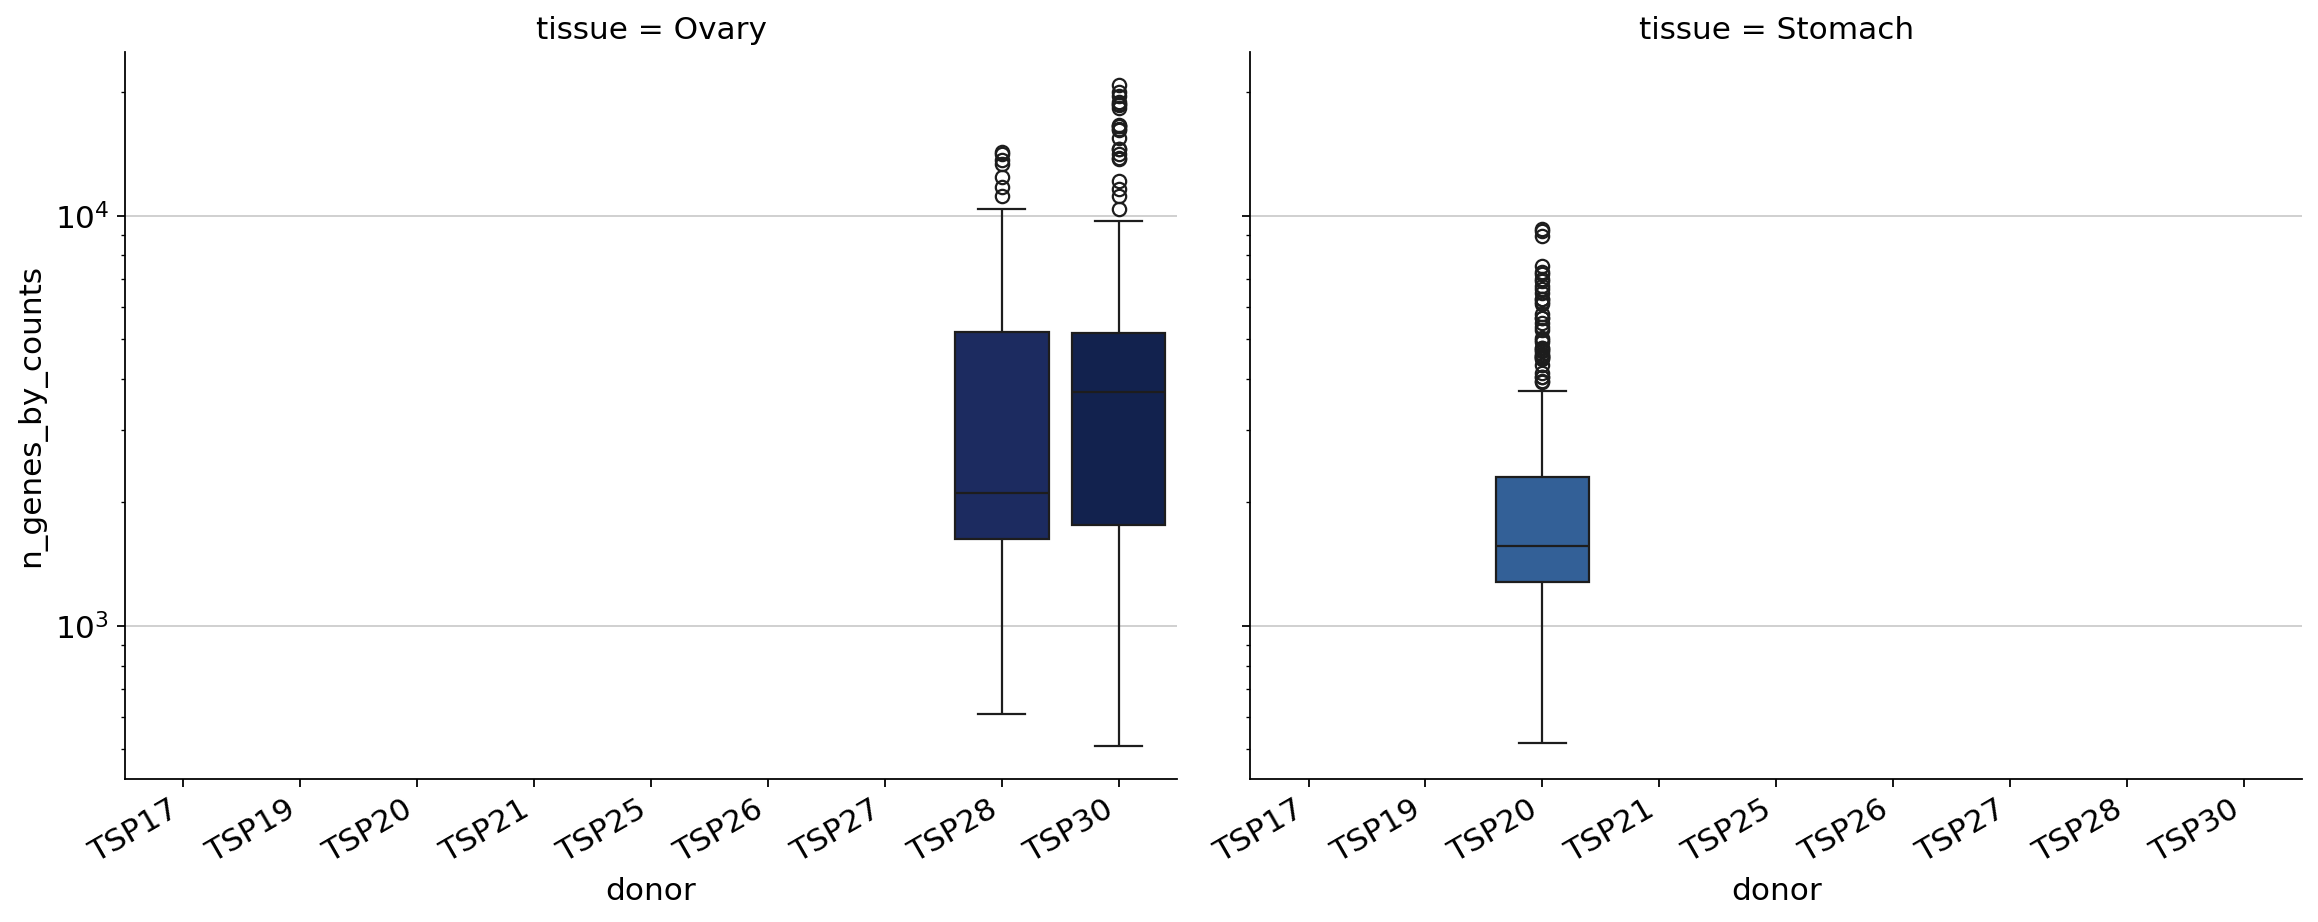

In [30]:
# Run for smartseq2 genes
df = metadata[metadata['method'] == 'smartseq']
tissue_order = list(set(df["tissue"]))
tissue_order.sort()

# Create FacetGrid
g = sns.FacetGrid(
    df, 
    col="tissue", 
    col_wrap=4, 
    height=6, 
    aspect=1.2, 
    col_order=tissue_order
)

# number of genes
def boxplot_with_colors(data, **kwargs):
    sns.boxplot(
        data=data,
        x="donor",
        y="n_genes_by_counts",
        hue="donor",  # Fix the warning
        order=donors_v2,
        palette=donors_color_dict,
        dodge=False,
        legend=False,
        **kwargs
    )

g.map_dataframe(boxplot_with_colors)
g.set(yscale='log')
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')

plt.tight_layout()
plt.savefig("figures/paper2/ts_smartseq2_ngenes.pdf")

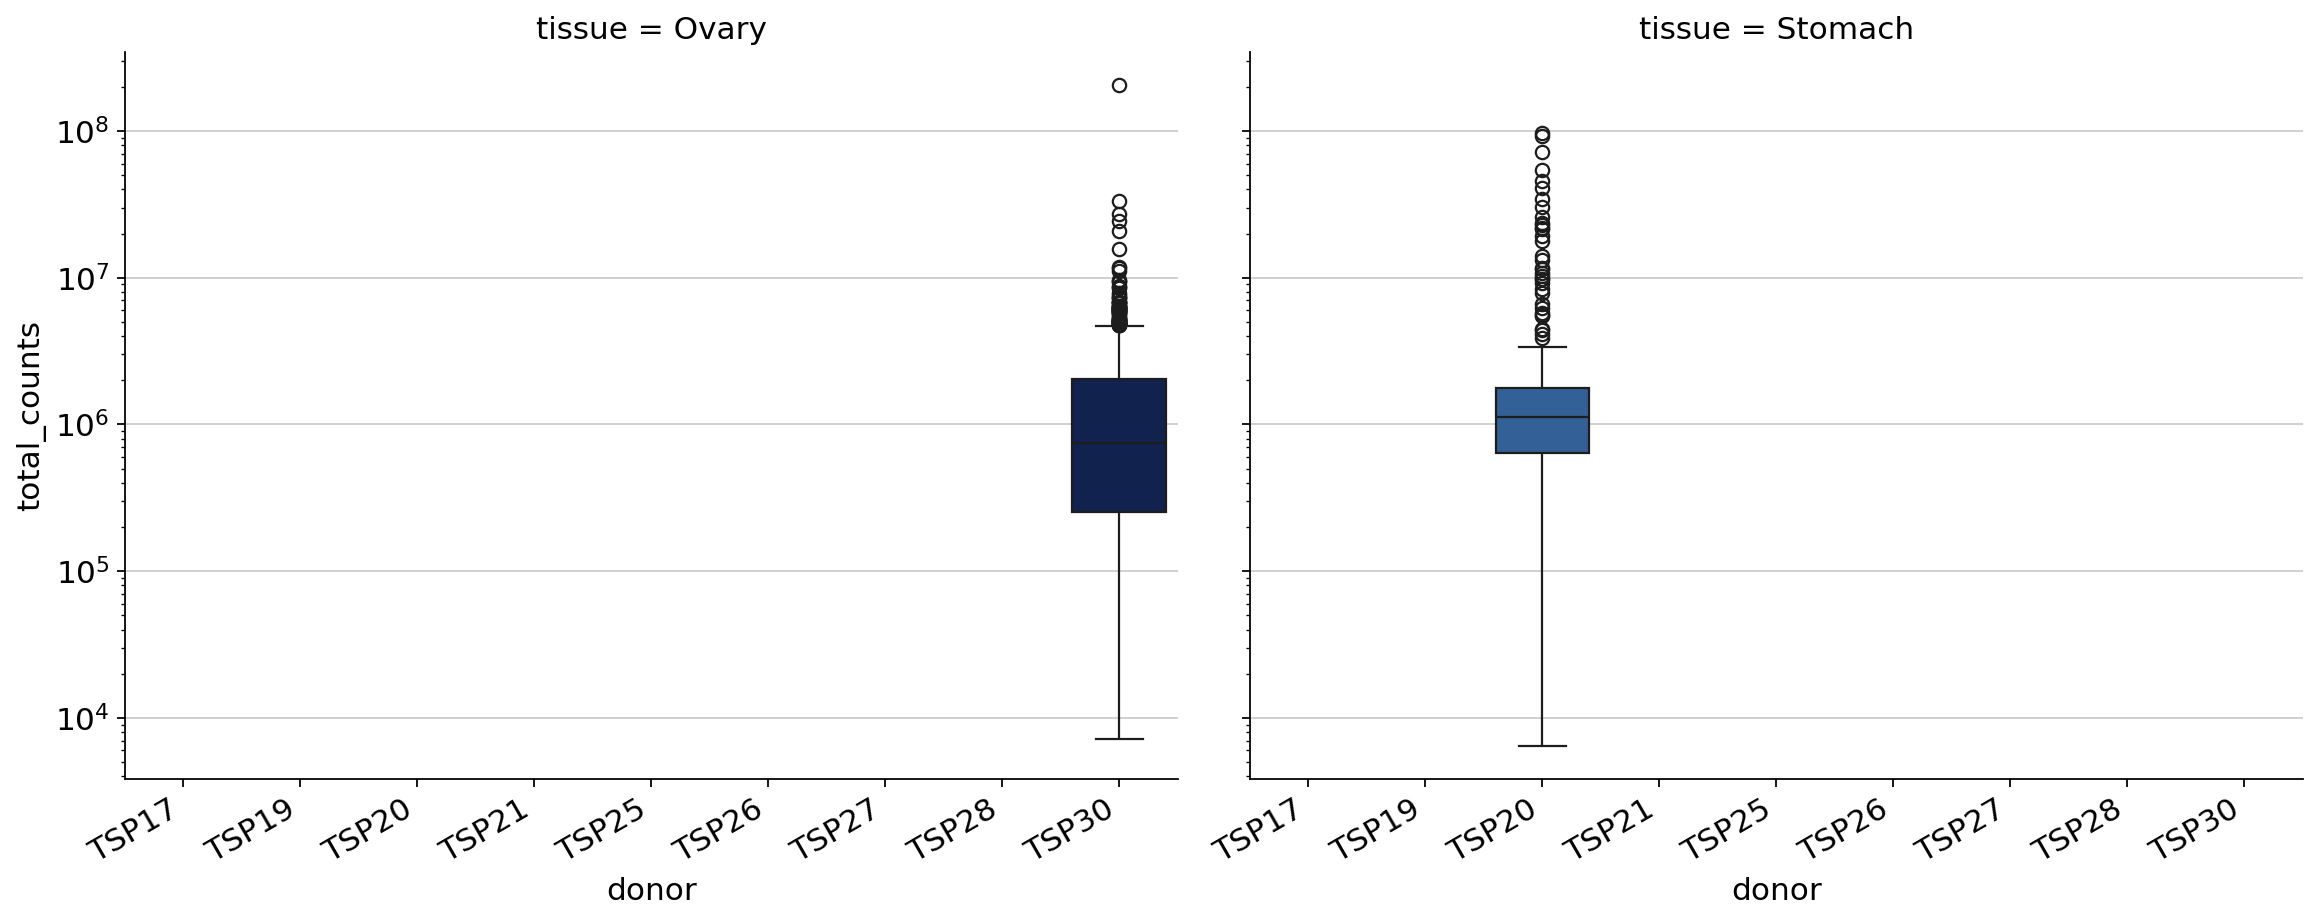

In [31]:
# Run for smartseq2 counts
df = metadata[metadata['method'] == 'smartseq']
tissue_order = list(set(df["tissue"]))
tissue_order.sort()

# Create FacetGrid
g = sns.FacetGrid(
    df, 
    col="tissue", 
    col_wrap=4, 
    height=6, 
    aspect=1.2, 
    col_order=tissue_order
)

# number of counts
def boxplot_with_colors(data, **kwargs):
    sns.boxplot(
        data=data,
        x="donor",
        y="total_counts",
        hue="donor",  # Fix the warning
        order=donors_v2,
        palette=donors_color_dict,
        dodge=False,
        legend=False,
        **kwargs
    )

g.map_dataframe(boxplot_with_colors)
g.set(yscale='log')
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')

plt.tight_layout()
plt.savefig("figures/paper2/ts_smartseq2_ncounts.pdf")

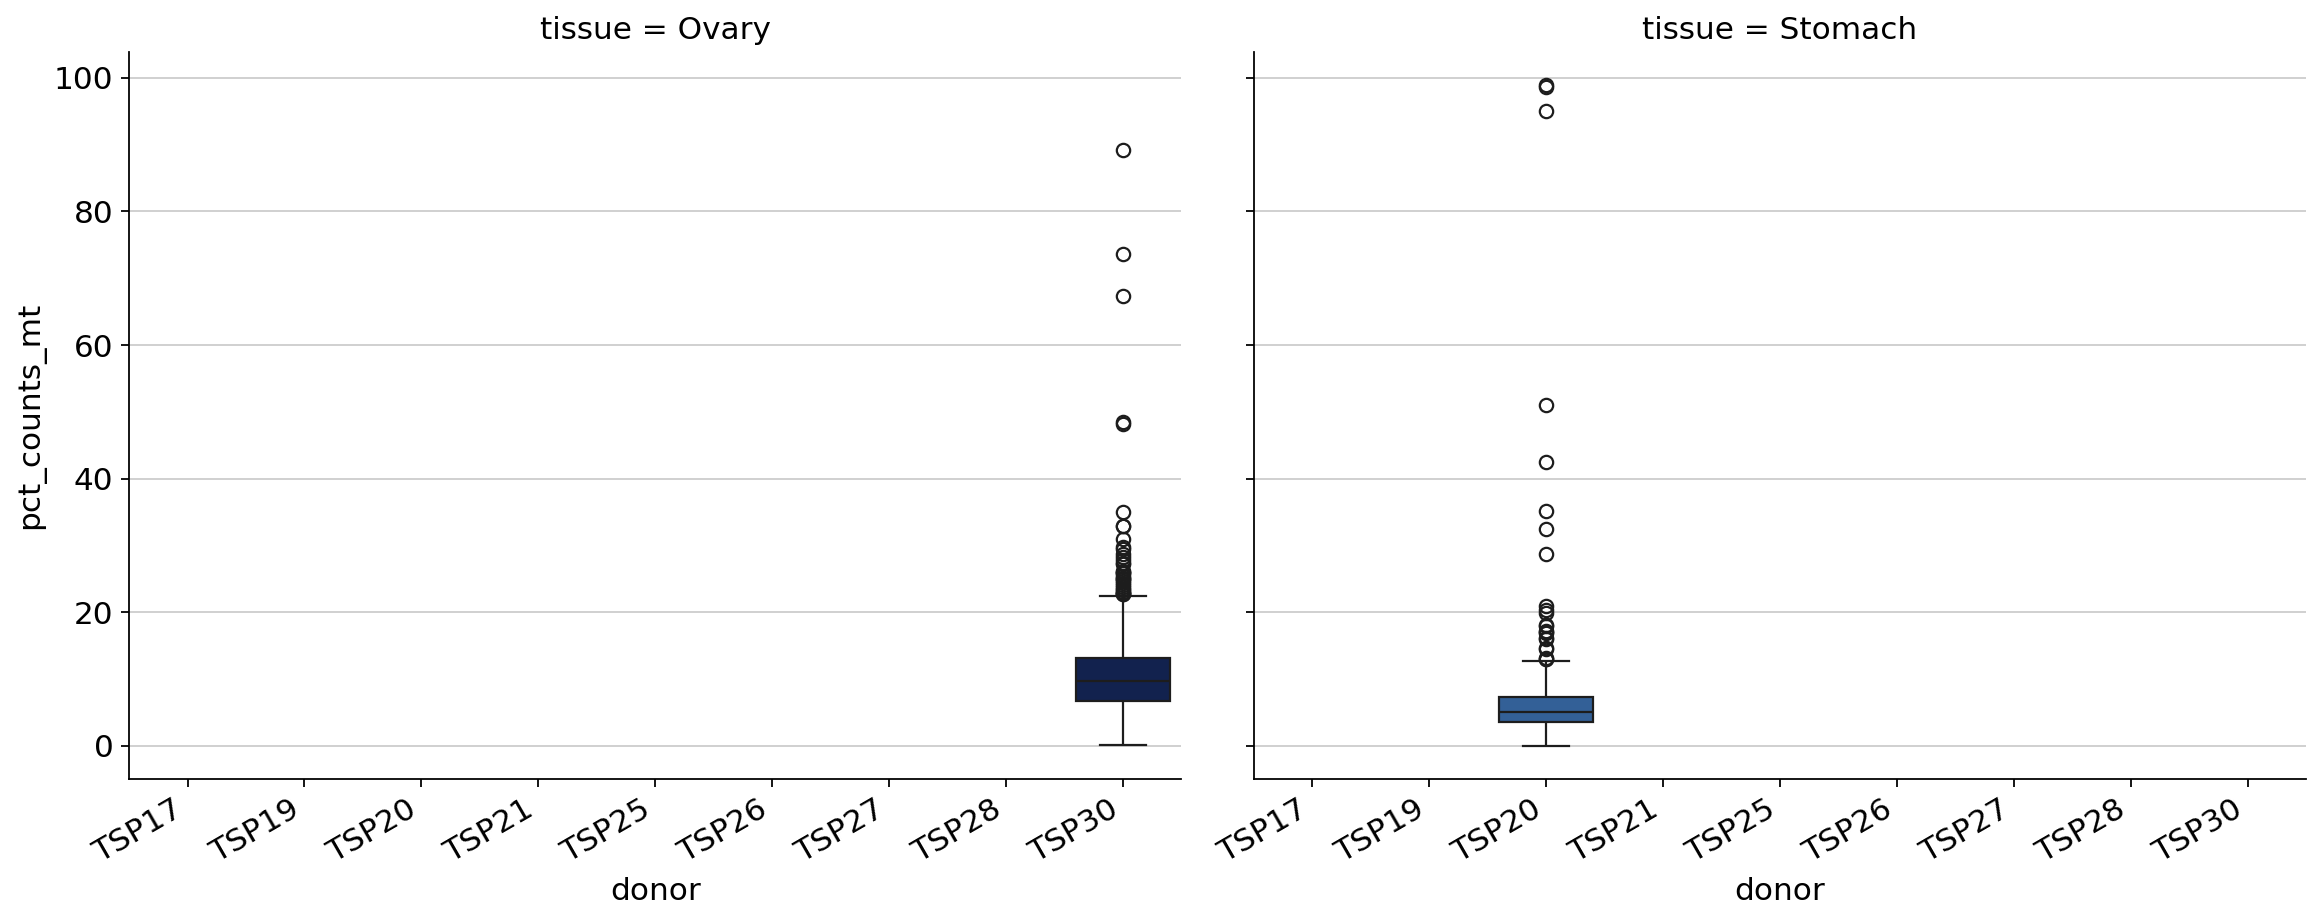

In [32]:
# Run for smartseq2 counts
df = metadata[metadata['method'] == 'smartseq']
tissue_order = list(set(df["tissue"]))
tissue_order.sort()

# Create FacetGrid
g = sns.FacetGrid(
    df, 
    col="tissue", 
    col_wrap=4, 
    height=6, 
    aspect=1.2, 
    col_order=tissue_order
)

# number of counts
def boxplot_with_colors(data, **kwargs):
    sns.boxplot(
        data=data,
        x="donor",
        y="pct_counts_mt",
        hue="donor",  # Fix the warning
        order=donors_v2,
        palette=donors_color_dict,
        dodge=False,
        legend=False,
        **kwargs
    )

g.map_dataframe(boxplot_with_colors)
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')

plt.tight_layout()
plt.savefig("figures/paper2/ts_smartseq2_pct_counts_mt.pdf")